In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors


In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)


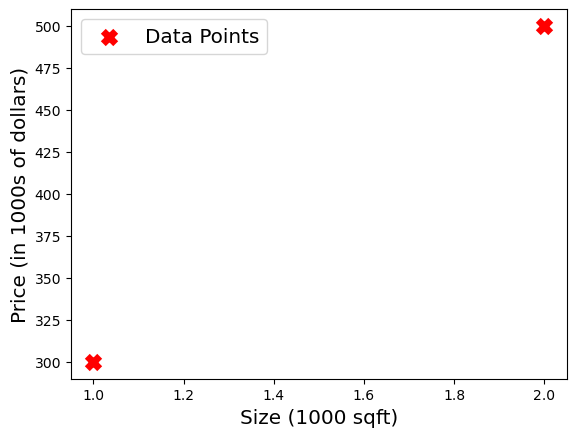

In [3]:
fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', lw=5, s=80, label="Data Points")
ax.legend(fontsize='x-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='x-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='x-large')
plt.show()


In [4]:
set_w = np.array([[200]])
set_b = np.array([100])


In [5]:
a1 = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(a1)


[[300.]]


In [6]:
pred = np.dot( X_train, set_w) + set_b


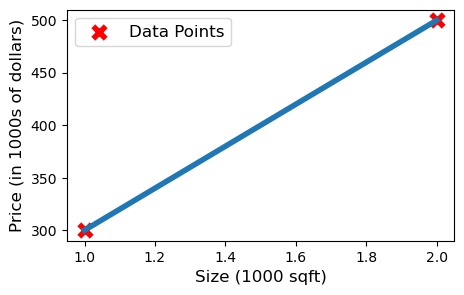

In [7]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(X_train, Y_train, marker='x', c='r', lw=4, s=80, label="Data Points")
ax.plot(X_train, pred, lw=4)
ax.legend(fontsize='large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='large')
ax.set_xlabel('Size (1000 sqft)', fontsize='large')
plt.show()


In [8]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix


In [9]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]


array([3., 4., 5.], dtype=float32)

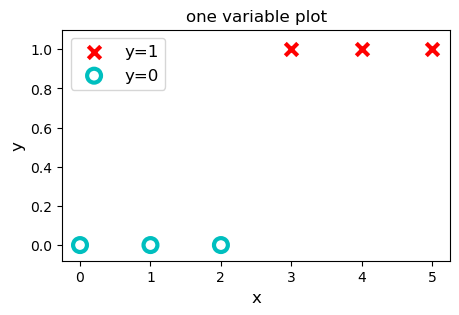

In [13]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1", lw=3)
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors="c",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [14]:
set_w = np.array([[2]])
set_b = np.array([-4.5])


In [18]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1.0/(1.0+np.exp(-z))
    return g

In [19]:
a1 = sigmoid(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(a1)


[[0.01098694]]


In [43]:
def plt_prob_1d(ax,fwb):
    x_space  = np.linspace(0, 5 , 50)
    y_space  = np.linspace(0, 1 , 50)

    z = np.zeros((len(x_space),len(y_space)))
    for i in range(len(x_space)):
        x = np.array([[x_space[i]]])
        z[:,i] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(x_space, y_space, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

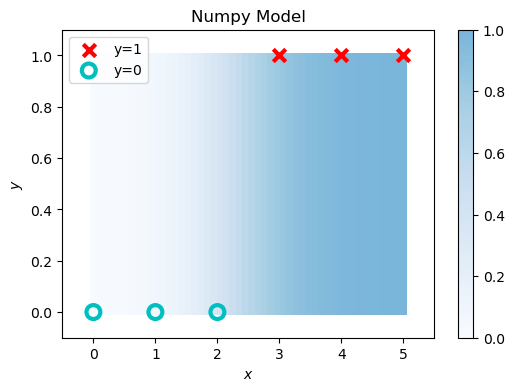

In [44]:
fig, ax = plt.subplots(figsize=(6,4))

layerf = lambda x : sigmoidnp(np.dot(set_w,x.reshape(1,1)) + set_b)
plt_prob_1d(ax, layerf)

ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1", lw=3)
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors="c",lw=3)
ax.set_ylim(-0.1,1.1)
ax.set_xlim(-0.5,5.5)
ax.set_ylabel('$y$')
ax.set_xlabel('$x$')
ax.set_title('Numpy Model')
ax.legend()
plt.show()